In [42]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist,squareform
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('Data/emision-co2-autos.csv', encoding="cp1252")

In [44]:
df.sample(3)

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
246,HYUNDAI,SANTA FE HTRAC 2.2D,RURAL 5 PUERTAS -- TODOTERRENO,4x2 / 4x4,HYUNDAI D4HB,2199.0,NaN,AUTOMÁTICA,GAS OIL,EURO V,187.0,06/12/2018,KR18030163,IDIADA,203.7,10.16,6.33,7.74,000150A
122,HYUNDAI,IONIQ HYBRID LH BLUE DRIVE,SEDÁN 5 PUERTAS,4x2,HYUNDAI G4LE / HYUNDAI MOBIS 36500-2BDB0,1580.0,NaN,AUTOMÁTICA,NAFTA / ELECTRICIDAD,EURO V,6.0,13/03/2018,83-V039-45954-30,TÜV Rheinland,91.0,3.90,3.90,4.00,000253B
255,MERCEDES-BENZ,C 200,SEDÁN 4 PUERTAS,4x2,MERCEDES-BENZ 264.915,1497.0,NaN,AUTOMÁTICA,NAFTA,EURO VI,202.0,18/12/2018,42.04.1427.00,TÜV NORD Mobilität,138.4,8.60,5.30,6.60,000164A


In [45]:
display(df.dtypes)
display(df.shape)

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

(432, 19)

In [46]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

vehiculo_marca                20
vehiculo_modelo               20
vehiculo_tipo                 20
vehiculo_traccion             20
vehiculo_id_motor             20
vehiculo_cilindrada           21
vehiculo_potencia            307
vehiculo_tipo_transmision     15
vehiculo_tipo_combustible     14
vehiculo_standard_emision     21
lca_numero                   139
fecha_firma                   28
ensayo_gei_numero             20
ensayo_gei_laboratorio        20
emision_CO2                   20
consumo_urbano                22
consumo_extraurbano           22
consumo_mixto                 20
id_etiqueta                   20
dtype: int64


In [47]:
#Elimino vehiculo_potencia
df.drop(columns=['vehiculo_potencia', 'lca_numero'], inplace=True)
df.dropna(inplace=True)

In [48]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_id_motor            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
fecha_firma                  0
ensayo_gei_numero            0
ensayo_gei_laboratorio       0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
id_etiqueta                  0
dtype: int64


In [49]:
display(df.shape)

(398, 17)

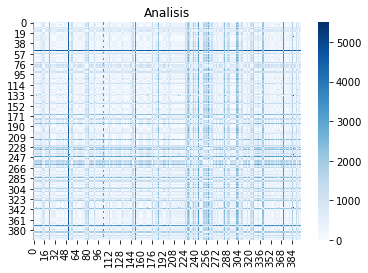

In [59]:
sns.heatmap(squareform(pdist(df[['vehiculo_cilindrada']])),cmap='Blues')
plt.title('Analisis');